In [1]:
import requests

requests.get('http://www.google.com', timeout=10).ok

True

In [2]:
%%capture

!pip install --upgrade kaggle-environments

In [3]:
from kaggle_environments import make
env = make("chess", debug=True)

No pygame installed, ignoring import



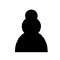
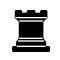
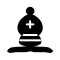
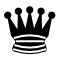
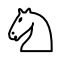
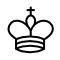
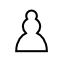
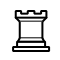
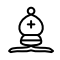
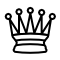
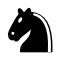
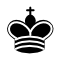

In [4]:
result = env.run(['random', 'random'])
env.render(mode='ipython', width=1000, height=1000)

In [5]:
%%writefile main.py

from Chessnut import Game
import time, random

def chessbot(obs):
    game = Game(obs.board)
    moves = list(game.get_moves())

    for move in moves[:10]:
        g = Game(obs.board)
        g.apply_move(move)
        if g.status == Game.CHECKMATE:
            return move

    for move in moves[:10]:
        if game.board.get_piece(Game.xy2i(move[2:4])) != ' ':
            return move

    for move in moves[:10]:
        if "q" in move.lower():
            return move

    return random.choice(moves)

Writing main.py


Agent exit status/reward/time left: 
	 DONE / 0.5 / 9.982177
	 DONE / 0.5 / 10





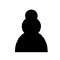
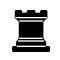
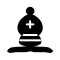
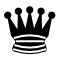
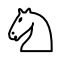
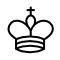
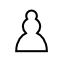
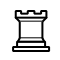
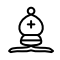
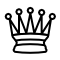
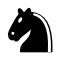
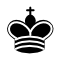

In [6]:
result = env.run(['main.py', 'random'])
print('Agent exit status/reward/time left: ')

for agent in result[-1]:
    print('\t', agent.status, '/', agent.reward, '/', agent.observation.remainingOverageTime)
print('\n')

env.render(mode='ipython', width=1000, height=1000)

# New attempt

### This code was stolen from Vyacheslav Bolotin, here is the kaggle link: https://www.kaggle.com/code/vyacheslavbolotin/chess-bot-starter-step-0-0-0-3?scriptVersionId=209647842

In [7]:
%%writefile Chess_bot_v2.py

import time, random
from Chessnut import Game

piece_sym = ['K', 'k', 'Q', 'q', 'R', 'r', 'B', 'b', 'N', 'n', 'P', 'p']
piece_val = [0, 0, 100, 100, 50, 50, 30, 30, 30, 30, 10, 10]
piece_val_dict = dict(zip(piece_sym, piece_val))

def evaluate_position(board):
    total_score = 0
    for square in range(64):
        piece = board.get_piece(square)
        if piece != ' ':
            piece_value = piece_val_dict.get(piece.upper(), 0)
            if piece.isupper():
                total_score += piece_value
            else:
                total_score -= piece_value
    return total_score

def make_move(move, time_to_start_thinking, is_execute_print=False):
    duration = round(time.time() - time_to_start_thinking, 3)
    if is_execute_print == True:
        print(f'[{move}, {duration}]')
    return move

def panic_mode(game, fen):
    moves = game.get_moves()
    for move in moves:
        game.apply_move(move)
        if game.status == Game.CHECKMATE:
            return move
        game.set_fen(fen)
    return random.choice(moves)

def Chess_bot_v2(obs):
    time_start = time.time()
    game = Game(obs.board)
    moves = list(game.get_moves())

    game = Game(fen=obs.board)
    if obs.remainingOverageTime < 2:
        return panic_mode(game, obs.board)

    evas, moves_eva, eva_init = [], [], evaluate_position(game.board)

    for move in moves:
        g = Game(obs.board)
        g.apply_move(move)
        eva_after = evaluate_position(g.board)
        moves_eva.append({
            'move': move,
            'max': eva_after - eva_init
        })
        evas.append(eva_after)

    if len(moves_eva) >= 1:
        moves_eva = sorted(moves_eva, key=lambda x: x['max'], reverse=True)
        max_move = moves_eva[0] if moves_eva != None and len(moves_eva) >= 1 else None
        if max_move != None:
            if max_move['max'] == 100:
                print(max_move)
                return make_move(max_move['move'], time_start)
            if max_move['max'] == 50:
                print(max_move)
                return make_move(max_move['move'], time_start)

    for move in moves:
        g = Game(obs.board)
        g.apply_move(move)
        if g.status == Game.CHECKMATE:
            return make_move(move,time_start)

    random.shuffle(moves)
    
    # 2. Check for captures
    for move in moves:
        if game.board.get_piece(Game.xy2i(move[2:4])) != ' ':
            #print(f'\n{move}\n')
            return make_move(move,time_start)

    # 3. Check for queen promotions
    for move in moves:
        if "q" in move.lower():
              #print(f'\n{move}\n')
            return make_move(move,time_start)

    # 4. Random move if no checkmates or captures

    move = random.choice(moves)
    
    return make_move(move,time_start)

Writing Chess_bot_v2.py


{'move': 'c7a8', 'max': 50}
{'move': 'd5c3', 'max': 100}
{'move': 'b3c4', 'max': 50}
Agent exit status/reward/time left: 
	 DONE / 1 / 7.498644
	 DONE / 0 / 10





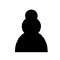
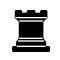
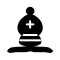
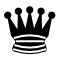
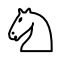
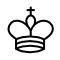
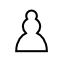
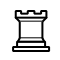
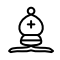
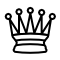
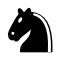
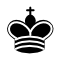

In [8]:
result = env.run(['Chess_bot_v2.py', 'random'])
print('Agent exit status/reward/time left: ')

for agent in result[-1]:
    print('\t', agent.status, '/', agent.reward, '/', agent.observation.remainingOverageTime)
print('\n')

env.render(mode='ipython', width=1000, height=1000)